In [406]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Data Visualization and Preprocessing

In [386]:
df = pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [387]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [388]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [389]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [390]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
for column in numeric_columns:
    
        Q1 = df[column].quantile(0.25)  
        Q3 = df[column].quantile(0.75)  
        IQR = Q3 - Q1  
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

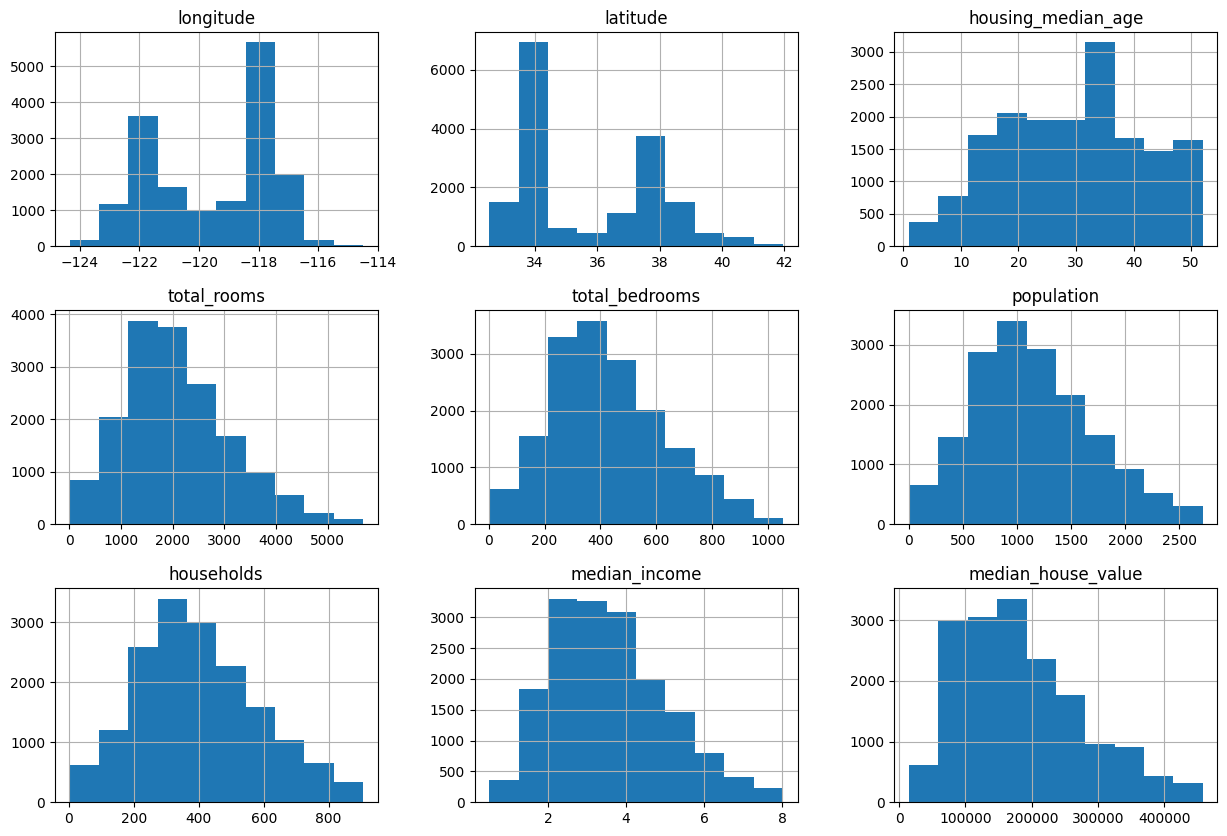

In [391]:
df.hist(figsize=(15, 10))

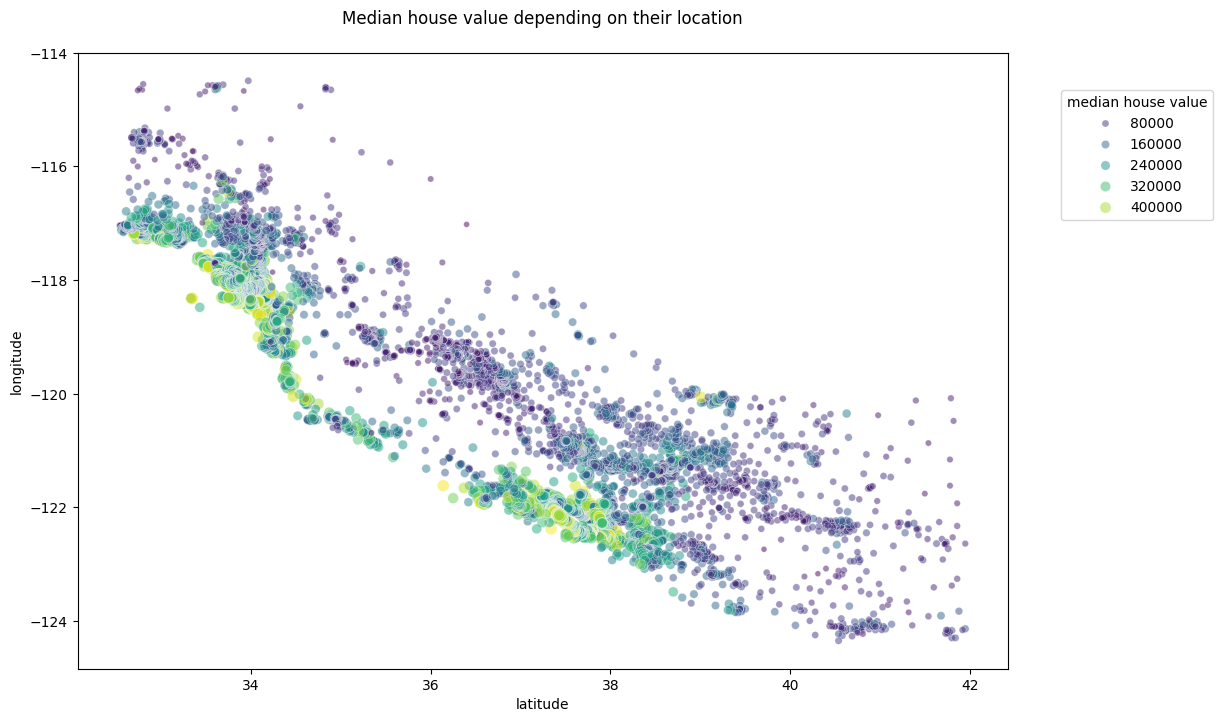

In [392]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="latitude", y="longitude", data=df, hue="median_house_value", alpha=0.5, size="median_house_value", palette="viridis")
plt.legend(title="median house value", bbox_to_anchor=(1.05, 0.95), loc="upper left")
_ = plt.title("Median house value depending on their location\n")

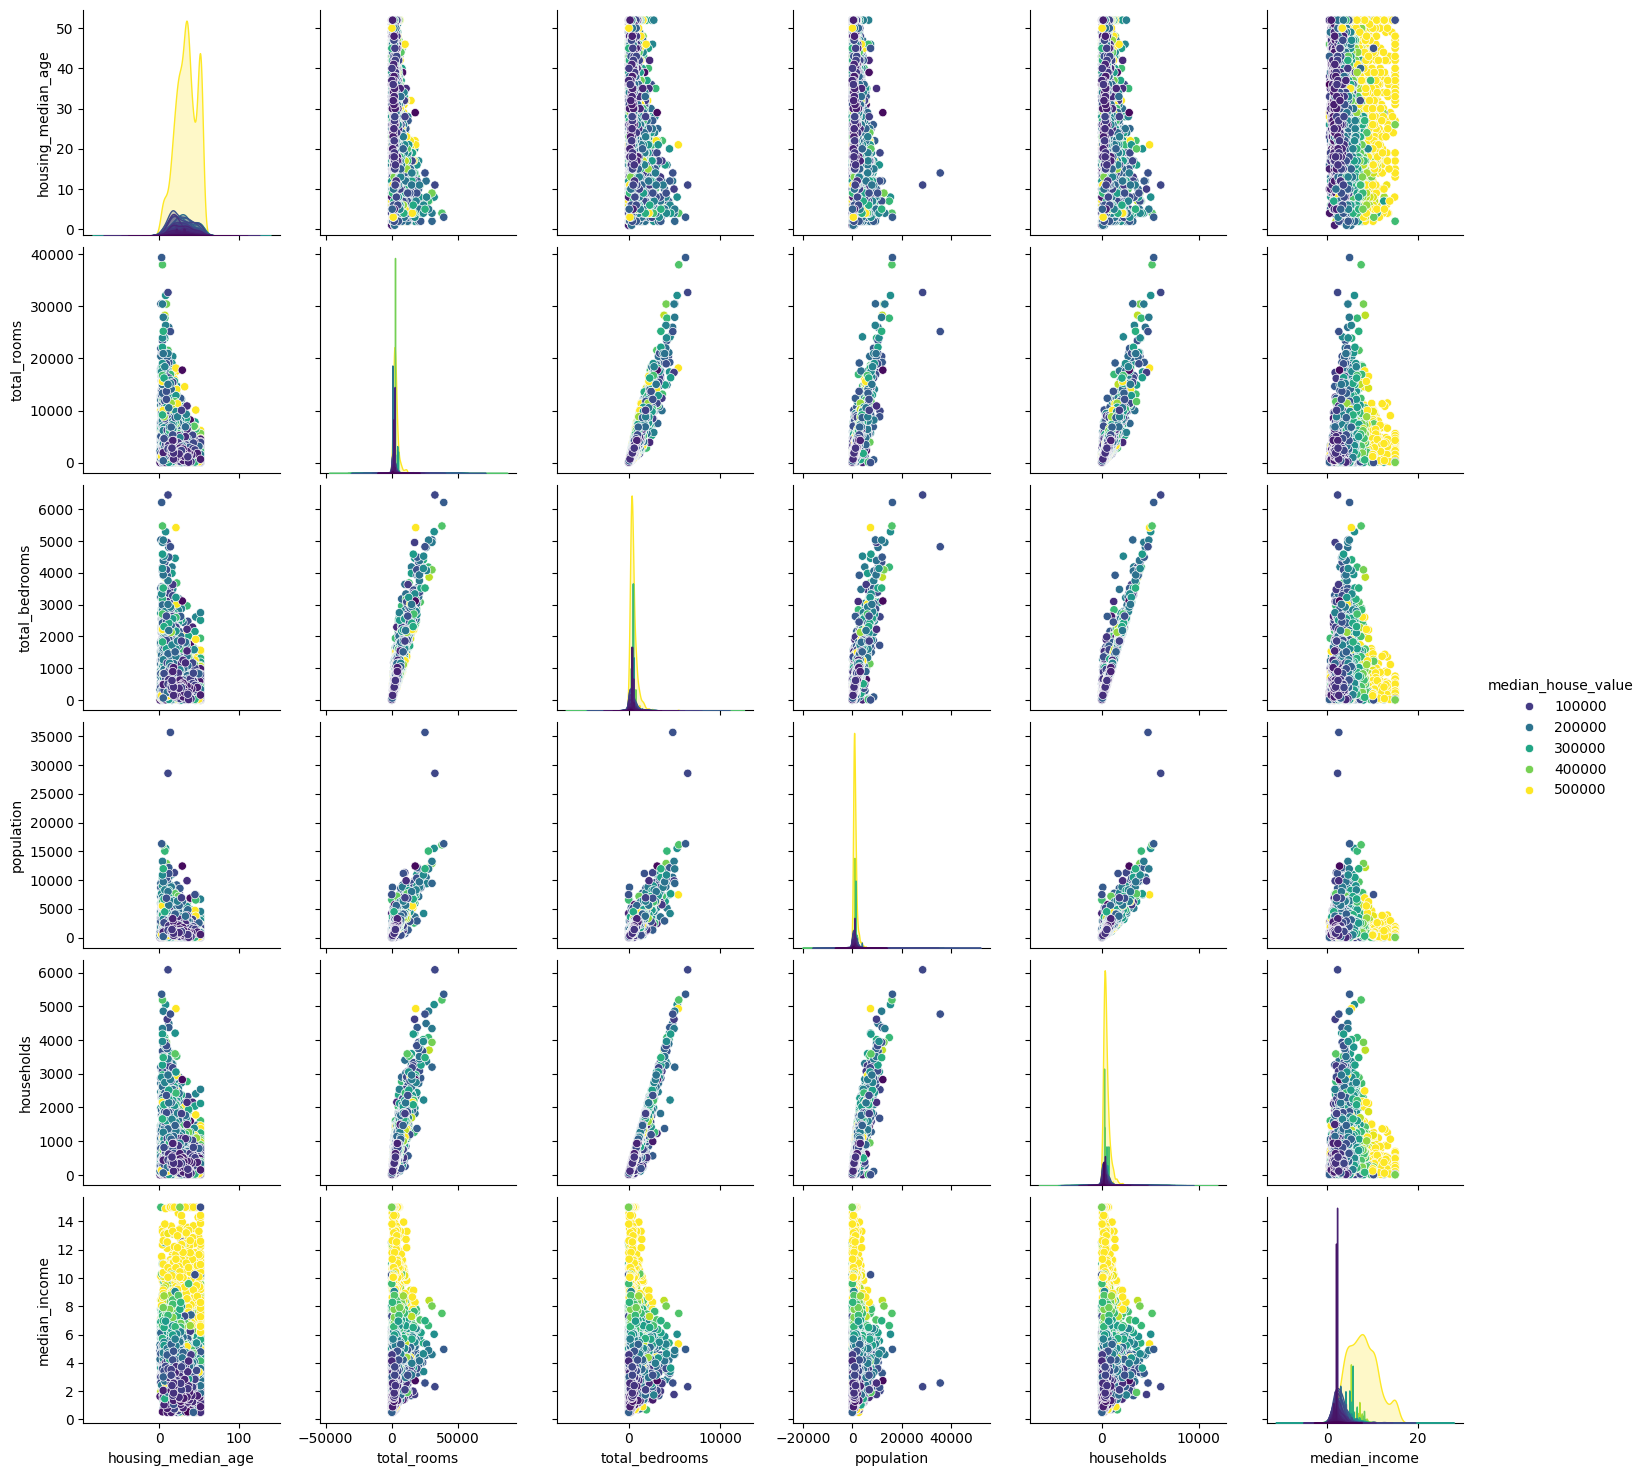

In [322]:
subset = df.drop(['longitude', 'latitude'], axis=1)
sns.pairplot(data=subset, hue="median_house_value", palette="viridis")

In [393]:
df.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7168
INLAND        5661
NEAR OCEAN    2095
NEAR BAY      1796
ISLAND           5
Name: count, dtype: int64

In [394]:
df = pd.get_dummies(df, columns=['ocean_proximity'], prefix="")
dummy_cols = [col for col in df.columns if col.startswith('_')]
df.rename(columns={col: col.lstrip('_') for col in dummy_cols}, inplace=True)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,False,False,False,True,False
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,False,False,False,True,False


In [395]:
df['bedroom_ratio'] = df['total_bedrooms']/df['total_rooms']
df['household_rooms'] = df["total_rooms"]/df['households']
df['population_per_household']=df['population']/df['households']

In [396]:
df = df[df['total_rooms'] != 0]
df = df[df['households'] != 0]

<Axes: >

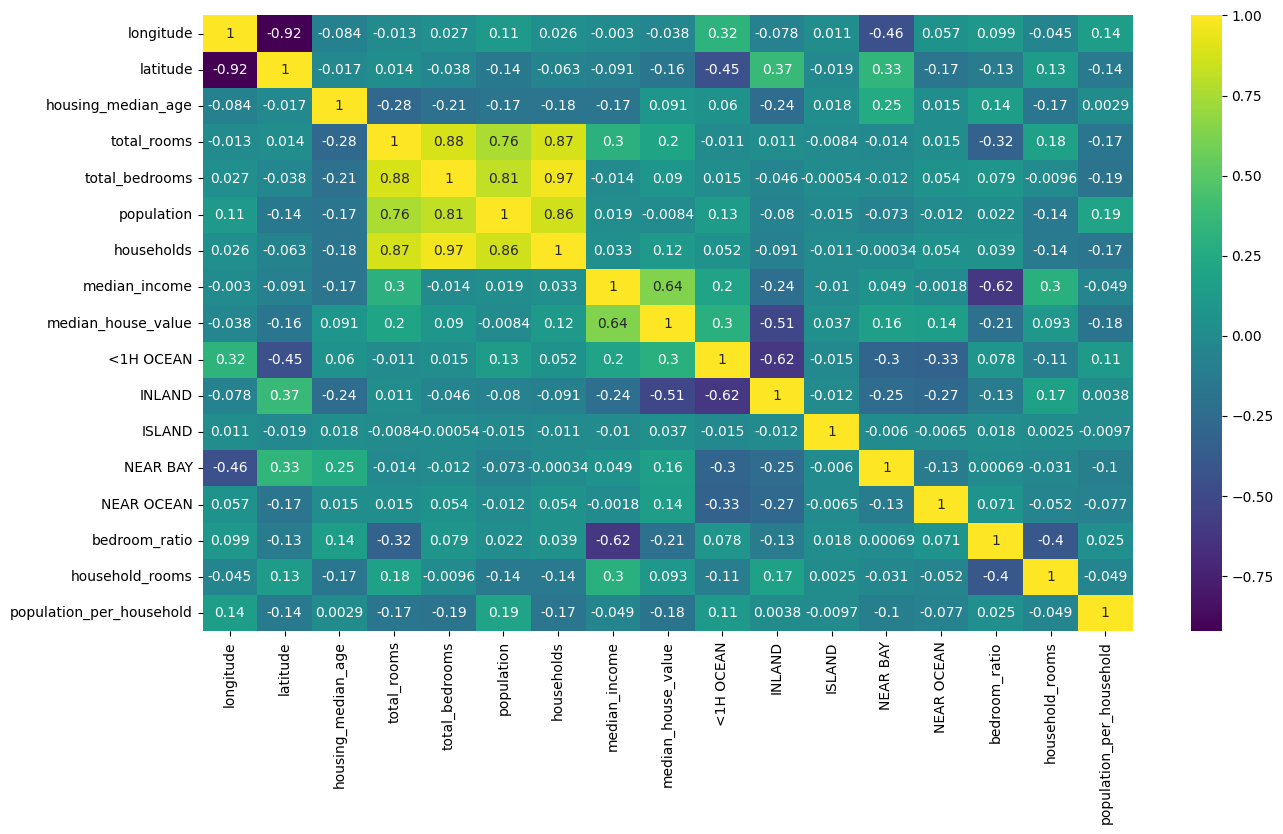

In [397]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, cmap="viridis")

In [398]:
X = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']

In [399]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [400]:
numerical_cols = X.select_dtypes(include=['float64']).columns

# Create a pipeline for numerical preprocessing
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  
    ('std_scaler', StandardScaler())               
])

preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_cols)
], remainder='passthrough')  

In [401]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Training ML Models

In [408]:
def calculate_rmse(model):
    model_preds = model.predict(X_test)
    model_mse = mean_squared_error(y_test, model_preds)
    model_rmse = np.sqrt(model_mse)
    print(model_rmse)

## Linear Regression

In [443]:
lr_model = LinearRegression()

In [444]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [445]:
lr_model.score(X_test, y_test)

0.6370774699898354

In [446]:
calculate_rmse(lr_model)

54446.54766161263


## Random Forest Regression 

In [508]:
rf_model = RandomForestRegressor(random_state = 42, n_estimators=400) 

In [509]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=400, random_state=42)

In [510]:
rf_model.score(X_test, y_test)

0.801951890139857

In [511]:
calculate_rmse(rf_model)

40220.61744463355


## Gradient Boost 

In [495]:
gb_model = GradientBoostingRegressor(random_state=42, n_estimators=400, max_depth=8) 

In [496]:
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=8, n_estimators=400, random_state=42)

In [497]:
gb_model.score(X_test, y_test)

0.8376592346599717

In [498]:
calculate_rmse(gb_model)

36414.7369381497
